# Step 1: Setup

In [ ]:
!pip install accelerate
!pip install flask
!pip install datasets

import os
import threading

# We will be using flask, a simple python library, as our webserver
from flask import Flask, render_template, send_file, request

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

# Make an ngrok account

ngrok is a tool that will allow us to get a public link for our application. When we run the Flask app in Colab, we are running it on one of Google's servers, so accessing it through `localhost` is not possible. Instead, we use ngrok, a reverse proxy, to create an internet-accessible way to access the app.

### a) Go to [ngrok.com](https://ngrok.com/)
### b) Click "Sign up for free" and create an account
### c) Verify your email
### d) Go to the [ngrok dashboard](https://dashboard.ngrok.com/get-started/your-authtoken) and copy your Authtoken

<center> 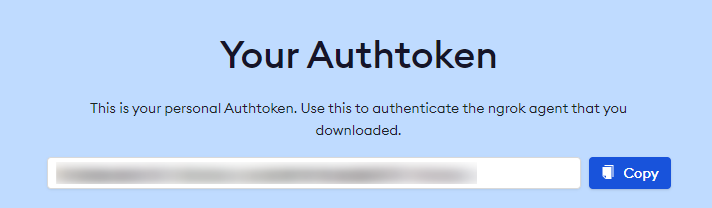</center>

### e) Paste your Authtoken below in place of the existing authtoken (neils) and then **run the cell**

In [ ]:
!pip install pyngrok
from pyngrok import ngrok, conf
conf.get_default().auth_token = '2ZkuloUMD7IS20ALifCXvvXmRva_3X71XDhbqhcab4d3wwFkg'
# Open a ngrok tunnel to the HTTP server
public_url = ngrok.connect(5000).public_url
# the first link that prints will be the link to your personal website!
print(" * ngrok tunnel \"{}\" -> \"http://127.0.0.1:{}/\"".format(public_url, 5000))

 * ngrok tunnel "https://3b29-35-185-255-125.ngrok-free.app" -> "http://127.0.0.1:5000/"


In [ ]:
import torch
from transformers import pipeline

device = "cuda:0" if torch.cuda.is_available() else "cpu"
#model="HuggingFaceH4/zephyr-7b-beta"
model="TinyLlama/TinyLlama-1.1B-Chat-v1.0"
# This next line instantiates
pipe = pipeline("text-generation", model=model, torch_dtype=torch.bfloat16,device=device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

In [ ]:
messages = [
    {
        "role": "system",
        "content": "You are a friendly Farm  Assistant who always gives farming advice and answers farmers' questions",
    },
    {"role": "user", "content": "My coffee berries have brown spots and are still green. What could be the problem?"},
]
asks = pipe.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
outputs = pipe(asks, max_new_tokens=512, do_sample=True, temperature=0.7, top_k=50, top_p=0.95)
resp=outputs[0]["generated_text"].split('assistant|>\n')[1]
print(resp)

Coffee berries are typically green and have a small, white bean within. Brown spots on coffee berries indicate a condition called "browning" or "browning spot." 

Brown spots on coffee berries are caused by a process called "browning." This is an unpleasant condition that occurs when coffee berries become damaged by moisture, heat, or cold temperatures. The brown spots usually appear on the underside of the coffee berry and gradually spread to the top.

The browning process can be slowed down or even stopped by applying a product called "browning inhibitor" to the coffee berries. This product helps to prevent or slow down the browning process, allowing the coffee berries to develop their full flavor. If you have brown spots on coffee berries, you can apply a browning inhibitor to the coffee berries to help them develop a fuller, richer flavor.


In [ ]:
import os
if not os.path.isdir('/content/app/'):
  os.mkdir("/content/app/")
os.chdir("/content/app")
if not os.path.isdir('/content/app/static/'):
  os.mkdir("/content/app/static/")

os.chdir("./static")



# with open("styles.css", 'w') as f:
#   f.write(css)

os.chdir("..")



os.chdir("/content/app")

html = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <!-- <link rel="stylesheet" type="text/css" href="{{ url_for('static',filename='styles.css') }}" /> -->
    <link
    href="https://fonts.cdnfonts.com/css/cera-round-pro-demo"
    rel="stylesheet"
    />
    <title>East Africa Agricultural Assistant</title>
      <script src="https://cdn.tailwindcss.com"></script>
</head>
<body style="font-family:Cera Round PRO Demo, Arial, Helvetica, sans-serif;" class="tracking-wide">

  <h1 class="text-3xl text-center mt-36 max-w-2xl mx-auto font-bold">EAST AFRICA AGRICULTURAL ASSISTANT</h1>

      <h3 class="text-lg mx-auto max-w-lg mt-10 px-2 mt-16">{{question|default("What is the most rampant crop disease?", true)}}</h3>

    {% autoescape false %}
        {% if generated_text %}
        <p class="max-w-lg bg-slate-100 rounded-xl mx-auto p-4 my-4">{{generated_text}}</p>
        {% endif %}
    {% endautoescape %}
        <div class="fixed bottom-4 left-0 right-0 mx-auto p-0.5 bg-gradient-to-r from-blue-500 to-purple-500 max-w-lg rounded-3xl">
            <form action="\submit-prompt" method="post" id="submission-form" class="relative">
                <input
                    type="text"
                    id="prompt"
                    name="prompt-input"
                    class="message w-full p-4 rounded-3xl outline-none text-purple-700"
                    placeholder="Enter your prompt"
                />
                <button
                type="submit"
                    class="absolute text-white top-2 w-20 text-sm hover:bg-blue-500 rounded-lg bg-gradient-to-r from-blue-500 to-purple-500 p-2 right-4"
                >
                    Ask
                </button>
            </form>
          </div>

</body>
</html>
"""

with open("index.html", 'w') as f:
  f.write(html)

# Goal: Deploy LLM assistant

Flask App Routing
* routes are API endpoints

In [ ]:
import os
import logging

# Set the root directory correctly
os.chdir("/content/app")
app = Flask(__name__,template_folder='.')

# Update any base URLs to use the public ngrok URL
app.config["BASE_URL"] = public_url


# Define Flask routes
@app.route("/")
def initial():
  return render_template('index.html')


@app.route('/submit-prompt', methods=['POST'])
def generate_image():
  prompt = request.form['prompt-input']
  messages = [
      {
          "role": "system",
          "content": "You are a friendly chatbot who always responds in the style of a pirate",
      },
      {"role": "user", "content": prompt},
  ]

  asks = pipe.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
  outputs = pipe(asks, max_new_tokens=256, do_sample=True, temperature=0.7, top_k=50, top_p=0.95)
  #getting the users inputted prompt as a variable
  question=outputs[0]["generated_text"].split('user|>\n')[1].split('</s>')[0]

  #getting the response as a variable
  resp=outputs[0]["generated_text"].split('assistant|>\n')[1]

  #reflecting both into the template html
  return render_template('index.html', generated_text=resp.replace("\n"," <br> "), question=question)

# Start the Flask server in a new thread
threading.Thread(target=app.run, kwargs={"use_reloader": False, "debug":True}).start()

# Bonus Section: Fine Tuning OR RAG

There is a dataset in Huggingface that is an Agricultural Q&A dataset. We can use this for finetuning or as a RAG dataset.



In [ ]:
from datasets import load_dataset
dataset = load_dataset("KisanVaani/agriculture-qa-english-only", split="train")
for i in range(10):
    print(f"Datapoint {i + 1}:")
    print("Question:", dataset['question'][i])
    print("Answer:", dataset['answers'][i])
    print("\n")

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


Generating train split:   0%|          | 0/22615 [00:00<?, ? examples/s]

Datapoint 1:
Question: why is crop rotation important in farming?
Answer: This helps to prevent soil erosion and depletion, and can also help to control pests and diseases


Datapoint 2:
Question: What farming practice helps prevent soil erosion?
Answer: Crop Rotation


Datapoint 3:
Question: what is crop rotation
Answer: Crop rotation is the practice of growing a series of different crops in the same area over several seasons


Datapoint 4:
Question: what are the different methods of irrigation?
Answer: surface irrigation, drip irrigation, and sprinkler irrigation


Datapoint 5:
Question: why is soil health vital?
Answer: Soil health is critical to crop growth and productivity, as it provides the necessary nutrients and support for plants to thrive.


Datapoint 6:
Question: what are the causes of soil degradation?
Answer: erosion, compaction, and nutrient depletion


Datapoint 7:
Question: what is organic farming?
Answer: method of crop production that emphasizes the use of natural an